<a href="https://colab.research.google.com/github/willstauffernorris/DS-Unit-2-Linear-Models/blob/master/Copy_of_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [0]:
df.head()

##checking out the data

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


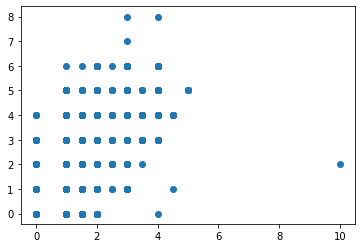

In [0]:
import matplotlib.pyplot as plt
import numpy as np


plt.scatter(df['bathrooms'], df['bedrooms'])

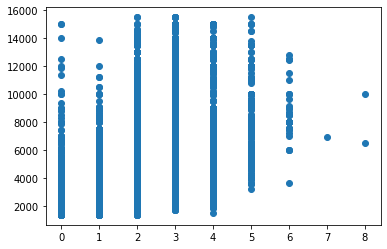

In [0]:

plt.scatter(df['bedrooms'], df['price'])

In [0]:
##instantiating the linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)

model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
df['bedrooms'].shape

(48818,)

In [0]:
bedrooms = df['bedrooms'][:, np.newaxis]
bedrooms.shape

(48818, 1)

In [0]:
price = df['price'][:, np.newaxis]

price.shape

(48818, 1)

In [0]:
model.fit(bedrooms, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.coef_

array([[853.25416753]])

In [0]:
model.intercept_

array([2267.97414918])

In [0]:
xfit = np.linspace(0,8)

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)


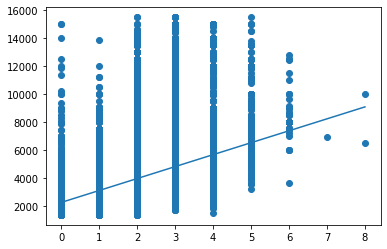

In [0]:
plt.scatter(bedrooms, price)
plt.plot(xfit, yfit);

#Defining a function to do the same thing


(48818, 1)
(48818, 1)
The Model Coefficient is:
[[853.25416753]]
The Model Intercept is:
[2267.97414918]


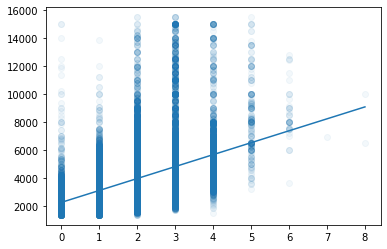

In [0]:
def linear_regression_builder(xaxis, yaxis):
  xaxis_massaged = xaxis[:, np.newaxis]
  print(xaxis_massaged.shape)
  yaxis_massaged = yaxis[:, np.newaxis]
  print(yaxis_massaged.shape)
  model.fit(xaxis_massaged, yaxis_massaged)
  print("The Model Coefficient is:")
  print(model.coef_)
  print("The Model Intercept is:")
  print(model.intercept_)
  xfit1 = np.linspace(min(xaxis),max(xaxis))
  Xfit1 = xfit1[:, np.newaxis]
  yfit1 = model.predict(Xfit1)
  plt.scatter(xaxis_massaged, yaxis_massaged, alpha = .05)
  plt.plot(xfit1, yfit1);
  return

linear_regression_builder(df['bedrooms'], df['price'])



(48818, 1)
(48818, 1)
The Model Coefficient is:
[[2573.37439508]]
The Model Intercept is:
[486.90453552]


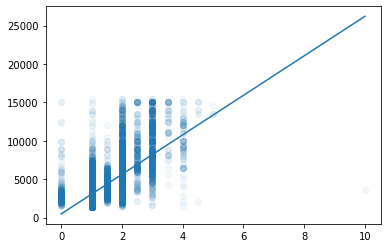

In [0]:
###looking at a few different variables to see if there are some interesting relationships

linear_regression_builder(df['bathrooms'], df['price'])

(48818, 1)
(48818, 1)
The Model Coefficient is:
[[5.8705331e-05]]
The Model Intercept is:
[0.3146876]


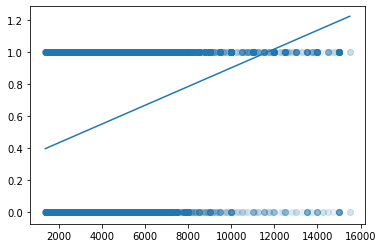

In [0]:
linear_regression_builder(df['price'], df['elevator'])

(48818, 1)
(48818, 1)
The Model Coefficient is:
[[-1638.14190247]]
The Model Intercept is:
[70335.08264694]


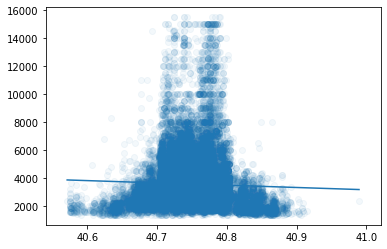

In [0]:
linear_regression_builder(df['latitude'], df['price'])

(48818, 1)
(48818, 1)
The Model Coefficient is:
[[-15315.11586964]]
The Model Intercept is:
[-1129321.79508122]


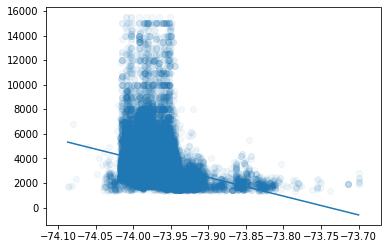

In [0]:
linear_regression_builder(df['longitude'], df['price'])


In [0]:
import plotly.express as px
px.scatter(df, x=df['bedrooms'], y= df['price'], trendline='ols')

###using Plotly

In [0]:
##Trying with multiple variables


In [0]:
bedroomsbathrooms = df[['bedrooms', 'bathrooms']]
bedroomsbathrooms


,bedrooms,bathrooms
0,3,1.5
1,2,1.0
2,1,1.0
3,1,1.0
4,4,1.0
...,...,...
49347,2,1.0
49348,1,1.0
49349,1,1.0
49350,0,1.0


In [0]:
price = df['price'][:, np.newaxis]

price.shape

(48818, 1)

In [0]:
model.fit(bedroomsbathrooms, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.coef_

array([[ 385.08418275, 2099.14867224]])

In [0]:
model.intercept_

array([464.88902434])

In [0]:
##I can make a linear regression- now I guess I need a 3d plot instead of a 2d plot.

In [0]:

##not quite sure how to do this.
#xfit = np.linspace(0,8)

#Xfit = xfit[:, np.newaxis]
#yfit = model.predict(Xfit)